In [1]:
import pandas as pd

# Define the root path for the CSV files
root_path = "/home/jovyan/workspace/"

# a. Import the datasets into the Python environment
print("Importing datasets...")
items_df = pd.read_csv(f"{root_path}items.csv")
restaurants_df = pd.read_csv(f"{root_path}restaurants.csv")
sales_df = pd.read_csv(f"{root_path}sales.csv")

# b. Examine the dataset's shape and structure, and look out for any outliers
print("\nExamining dataset shapes and structures...")

# Items dataset
print("\nItems Dataset:")
print(f"Shape: {items_df.shape}")
print("First 5 rows:")
print(items_df.head())
print("\nSummary statistics:")
print(items_df.describe())
print("\nMissing values:")
print(items_df.isnull().sum())

# Restaurants dataset
print("\nRestaurants Dataset:")
print(f"Shape: {restaurants_df.shape}")
print("First 5 rows:")
print(restaurants_df.head())
print("\nMissing values:")
print(restaurants_df.isnull().sum())

# Sales dataset
print("\nSales Dataset:")
print(f"Shape: {sales_df.shape}")
print("First 5 rows:")
print(sales_df.head())
print("\nSummary statistics:")
print(sales_df.describe())
print("\nMissing values:")
print(sales_df.isnull().sum())

Importing datasets...

Examining dataset shapes and structures...

Items Dataset:
Shape: (100, 5)
First 5 rows:
   id  store_id                               name  kcal   cost
0   1         4                     Chocolate Cake   554   6.71
1   2         4  Breaded Fish with Vegetables Meal   772  15.09
2   3         1                  Sweet Fruity Cake   931  29.22
3   4         1    Amazing Steak Dinner with Rolls   763  26.42
4   5         5                          Milk Cake   583   6.07

Summary statistics:
               id    store_id         kcal        cost
count  100.000000  100.000000   100.000000  100.000000
mean    50.500000    3.520000   536.730000   11.763700
std     29.011492    1.708446   202.212852    8.991254
min      1.000000    1.000000    78.000000    1.390000
25%     25.750000    2.000000   406.250000    5.280000
50%     50.500000    4.000000   572.500000    7.625000
75%     75.250000    5.000000   638.250000   18.790000
max    100.000000    6.000000  1023.000000 

In [2]:
# c. Merge the datasets into a single dataset
print("\nMerging datasets...")

# Merge sales with items on item_id (from sales) and id (from items)
merged_df = pd.merge(sales_df, items_df, left_on='item_id', right_on='id', how='left')

# Merge the result with restaurants on store_id (from items) and id (from restaurants)
merged_df = pd.merge(merged_df, restaurants_df, left_on='store_id', right_on='id', how='left')

# Select relevant columns
final_df = merged_df[['date', 'item_id', 'price', 'item_count', 'name_x', 'kcal', 'store_id', 'name_y']]

# Rename columns for clarity
final_df.columns = ['date', 'item_id', 'price', 'item_count', 'item_name', 'kcal', 'store_id', 'store_name']

print("\nFinal Merged Dataset:")
print(f"Shape: {final_df.shape}")
print("First 5 rows:")
print(final_df.head())
print("\nMissing values:")
print(final_df.isnull().sum())

# Check for any outliers in the final dataset
print("\nChecking for outliers in the final dataset...")
print(final_df.describe())

print("\nPreliminary analysis complete.")


Merging datasets...

Final Merged Dataset:
Shape: (109600, 8)
First 5 rows:
         date  item_id  price  item_count                        item_name  \
0  2019-01-01        3  29.22         2.0                Sweet Fruity Cake   
1  2019-01-01        4  26.42        22.0  Amazing Steak Dinner with Rolls   
2  2019-01-01       12   4.87         7.0             Fantastic Sweet Cola   
3  2019-01-01       13   4.18        12.0          Sweet Frozen Soft Drink   
4  2019-01-01       16   3.21       136.0             Frozen Milky Smoothy   

   kcal  store_id   store_name  
0   931         1  Bob's Diner  
1   763         1  Bob's Diner  
2   478         1  Bob's Diner  
3   490         1  Bob's Diner  
4   284         1  Bob's Diner  

Missing values:
date          0
item_id       0
price         0
item_count    0
item_name     0
kcal          0
store_id      0
store_name    0
dtype: int64

Checking for outliers in the final dataset...
             item_id          price     item_count 

In [5]:
!pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)


Plotting Top 10 Most Sold Items by Item Count...


/tmp/ipykernel_323/2682356064.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")


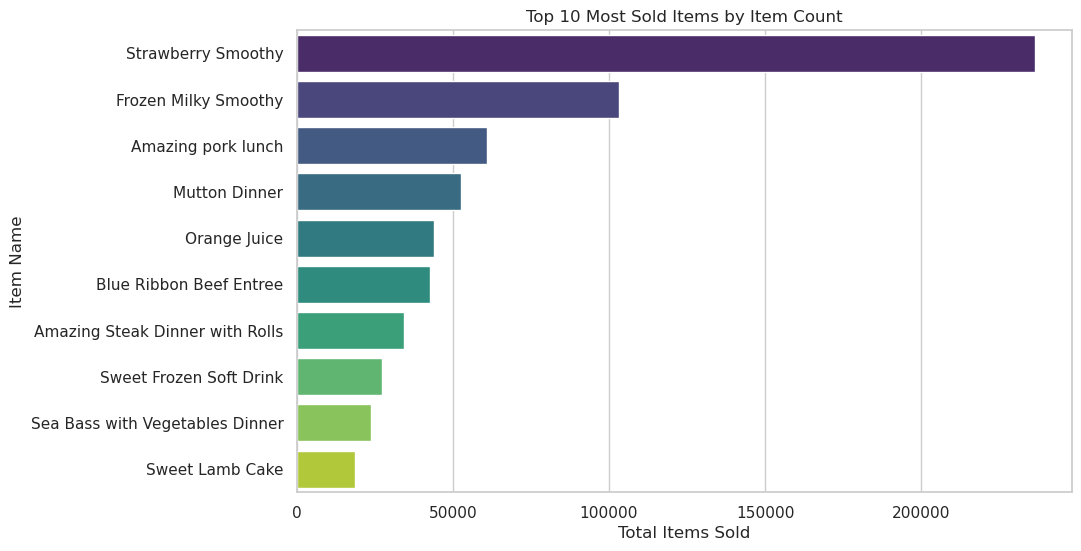

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# 1. Bar Plot: Top 10 Most Sold Items by Item Count
print("Plotting Top 10 Most Sold Items by Item Count...")
top_items = final_df.groupby('item_name')['item_count'].sum().nlargest(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_items.values, y=top_items.index, palette="viridis")
plt.title('Top 10 Most Sold Items by Item Count')
plt.xlabel('Total Items Sold')
plt.ylabel('Item Name')
plt.show()


Plotting Distribution of Calories (kcal) in Items...


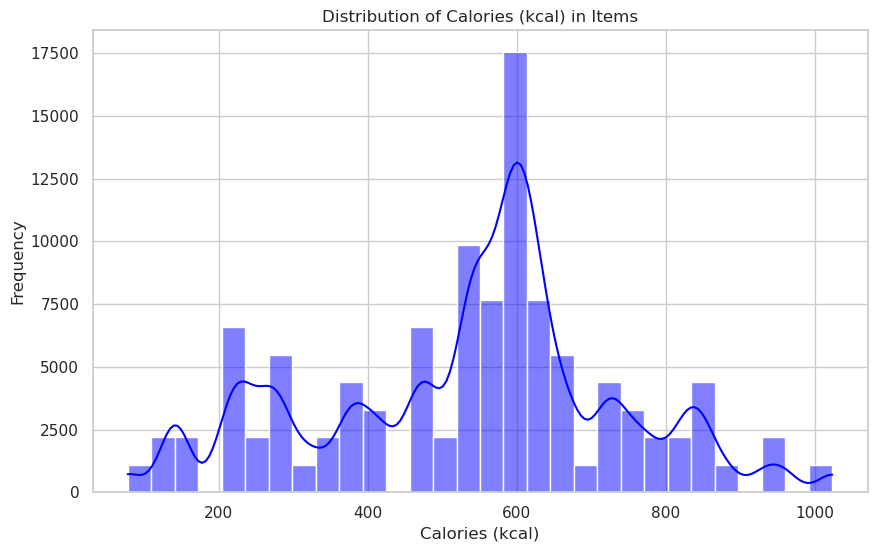

In [7]:
# 2. Histogram: Distribution of Calories (kcal) in Items
print("\nPlotting Distribution of Calories (kcal) in Items...")
plt.figure(figsize=(10, 6))
sns.histplot(final_df['kcal'], bins=30, kde=True, color='blue')
plt.title('Distribution of Calories (kcal) in Items')
plt.xlabel('Calories (kcal)')
plt.ylabel('Frequency')
plt.show()


Plotting Price vs. Calories (kcal)...


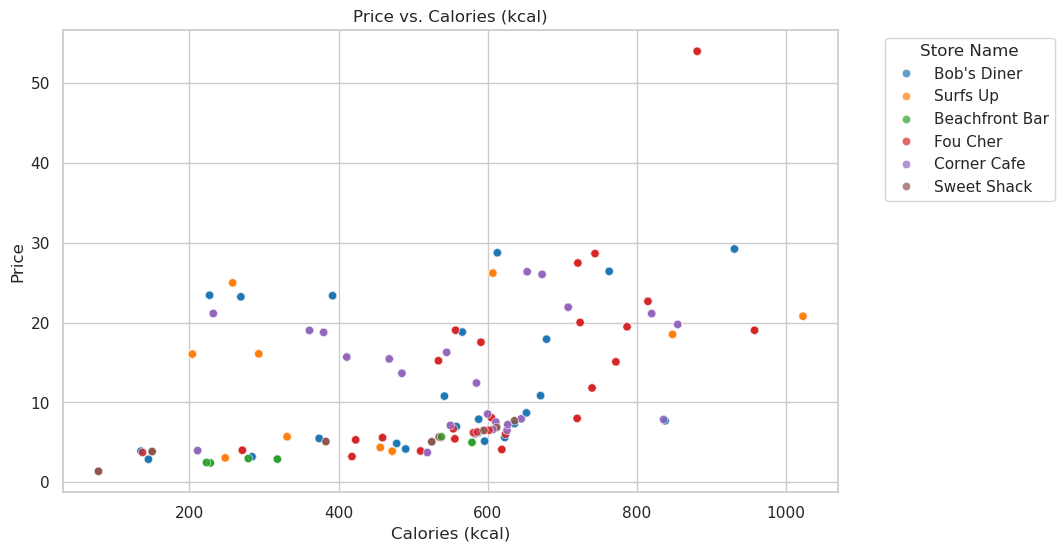

In [8]:
# 3. Scatter Plot: Price vs. Calories (kcal)
print("\nPlotting Price vs. Calories (kcal)...")
plt.figure(figsize=(10, 6))
sns.scatterplot(x='kcal', y='price', data=final_df, hue='store_name', palette='tab10', alpha=0.7)
plt.title('Price vs. Calories (kcal)')
plt.xlabel('Calories (kcal)')
plt.ylabel('Price')
plt.legend(title='Store Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


Plotting Distribution of Item Count by Store...


/tmp/ipykernel_323/1788058695.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='store_name', y='item_count', data=final_df, palette="Set2")


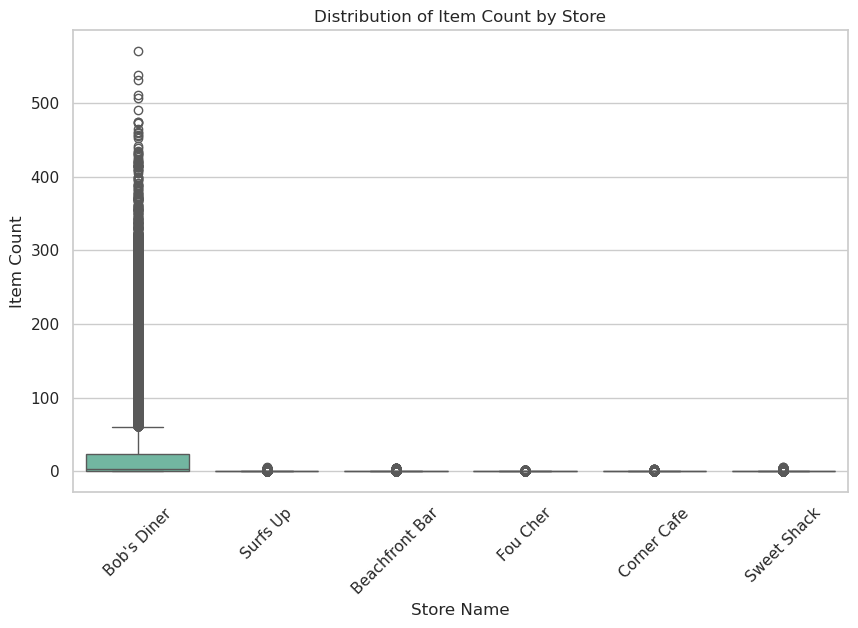

In [9]:

# 4. Box Plot: Distribution of Item Count by Store
print("\nPlotting Distribution of Item Count by Store...")
plt.figure(figsize=(10, 6))
sns.boxplot(x='store_name', y='item_count', data=final_df, palette="Set2")
plt.title('Distribution of Item Count by Store')
plt.xlabel('Store Name')
plt.ylabel('Item Count')
plt.xticks(rotation=45)
plt.show()


Plotting Total Sales Over Time (Date)...


/tmp/ipykernel_323/2685580522.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date'] = pd.to_datetime(final_df['date'])  # Convert date column to datetime


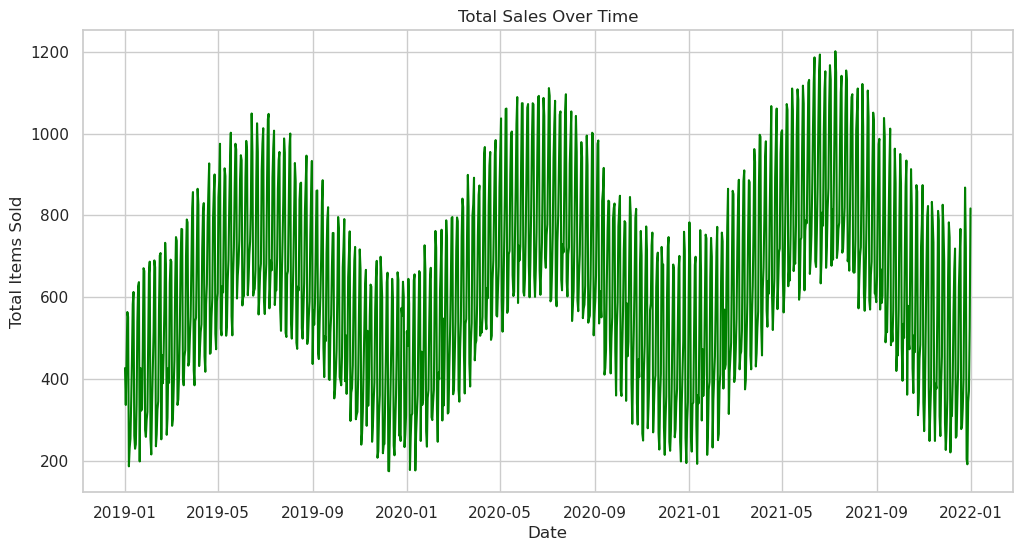

In [10]:
# 5. Line Plot: Total Sales Over Time (Date)
print("\nPlotting Total Sales Over Time (Date)...")
final_df['date'] = pd.to_datetime(final_df['date'])  # Convert date column to datetime
sales_over_time = final_df.groupby('date')['item_count'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=sales_over_time.index, y=sales_over_time.values, color='green')
plt.title('Total Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Items Sold')
plt.show()

/tmp/ipykernel_323/2231716855.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['date'] = pd.to_datetime(final_df['date'])


a. Date-wise Sales Pattern:


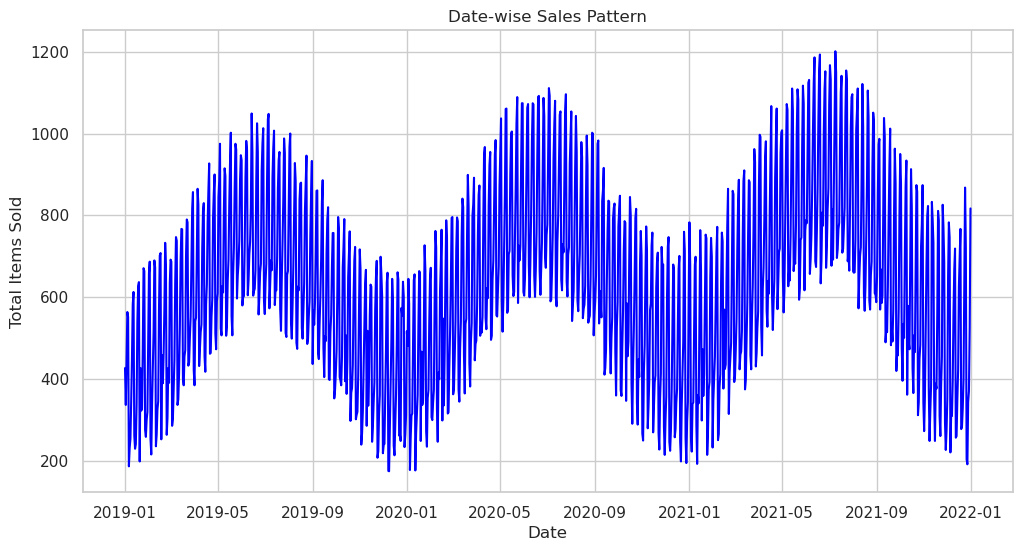

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# Ensure the date column is in datetime format
final_df['date'] = pd.to_datetime(final_df['date'])

# a. Examine the overall date-wise sales to understand the pattern
print("a. Date-wise Sales Pattern:")
datewise_sales = final_df.groupby('date')['item_count'].sum()
plt.figure(figsize=(12, 6))
sns.lineplot(x=datewise_sales.index, y=datewise_sales.values, color='blue')
plt.title('Date-wise Sales Pattern')
plt.xlabel('Date')
plt.ylabel('Total Items Sold')
plt.show()


b. Sales Fluctuation Across Days of the Week:


/tmp/ipykernel_323/1934437871.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['day_of_week'] = final_df['date'].dt.day_name()
/tmp/ipykernel_323/1934437871.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=daywise_sales.index, y=daywise_sales.values, palette="coolwarm")


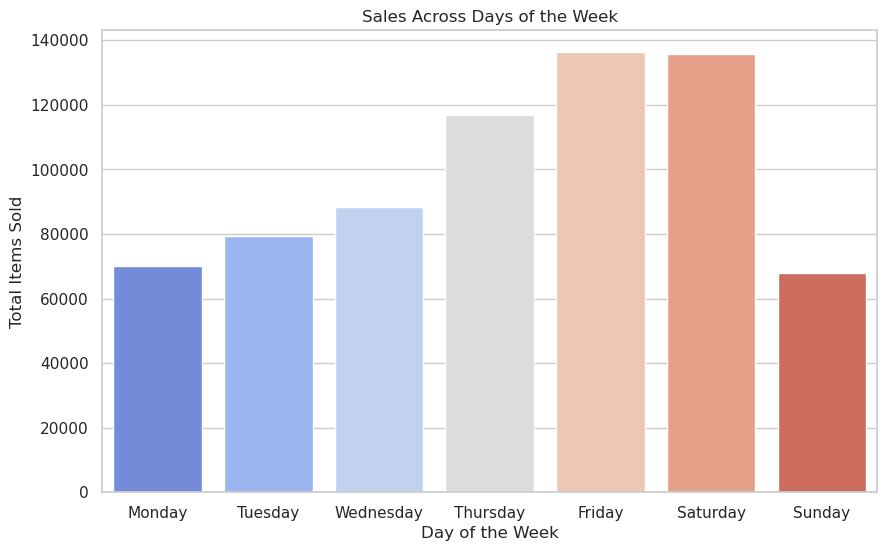

In [12]:
# b. Find out how sales fluctuate across different days of the week
print("\nb. Sales Fluctuation Across Days of the Week:")
final_df['day_of_week'] = final_df['date'].dt.day_name()
daywise_sales = final_df.groupby('day_of_week')['item_count'].sum().reindex([
    'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'
])
plt.figure(figsize=(10, 6))
sns.barplot(x=daywise_sales.index, y=daywise_sales.values, palette="coolwarm")
plt.title('Sales Across Days of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Total Items Sold')
plt.show()


c. Monthly Sales Trends:


/tmp/ipykernel_323/114162942.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['month'] = final_df['date'].dt.month_name()


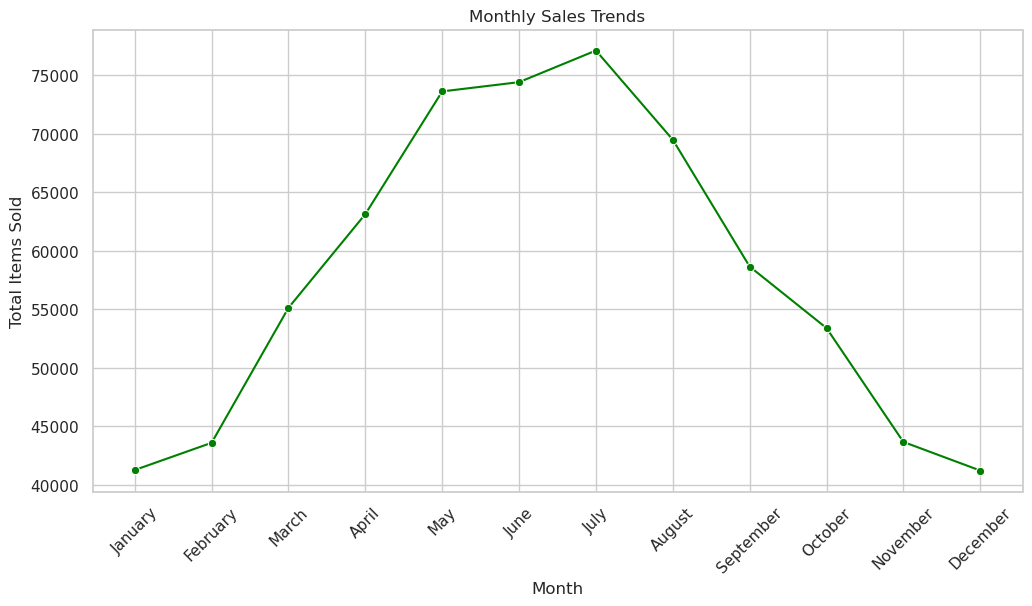

In [13]:
# c. Look for any noticeable trends in the sales data for different months of the year
print("\nc. Monthly Sales Trends:")
final_df['month'] = final_df['date'].dt.month_name()
monthly_sales = final_df.groupby('month')['item_count'].sum().reindex([
    'January', 'February', 'March', 'April', 'May', 'June', 
    'July', 'August', 'September', 'October', 'November', 'December'
])
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_sales.index, y=monthly_sales.values, marker='o', color='green')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Items Sold')
plt.xticks(rotation=45)
plt.show()


d. Quarterly Sales Distribution (Averaged Over Years):


/tmp/ipykernel_323/864326267.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values, palette="viridis")


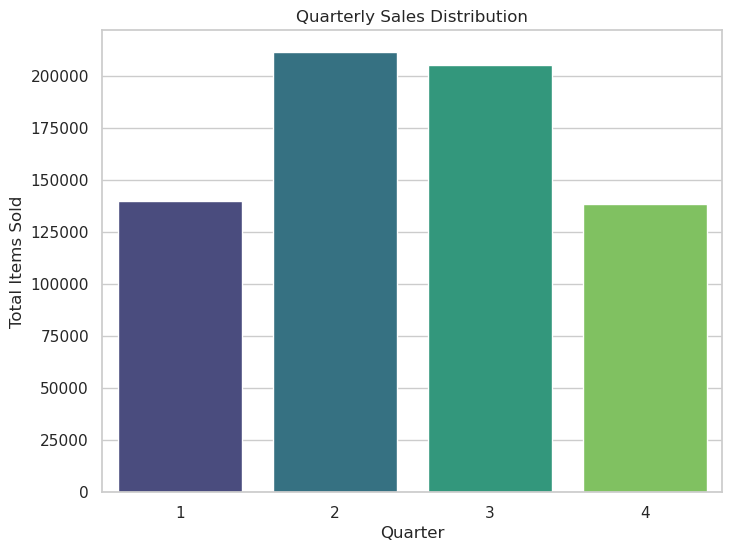

In [14]:
# d. Examine the sales distribution across different quarters averaged over the years
print("\nd. Quarterly Sales Distribution (Averaged Over Years):")
final_df['quarter'] = final_df['date'].dt.quarter
quarterly_sales = final_df.groupby('quarter')['item_count'].sum()
plt.figure(figsize=(8, 6))
sns.barplot(x=quarterly_sales.index, y=quarterly_sales.values, palette="viridis")
plt.title('Quarterly Sales Distribution')
plt.xlabel('Quarter')
plt.ylabel('Total Items Sold')
plt.show()


e. Restaurant Performance Analysis:


/tmp/ipykernel_323/1527439361.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=restaurant_sales.values, y=restaurant_sales.index, palette="magma")


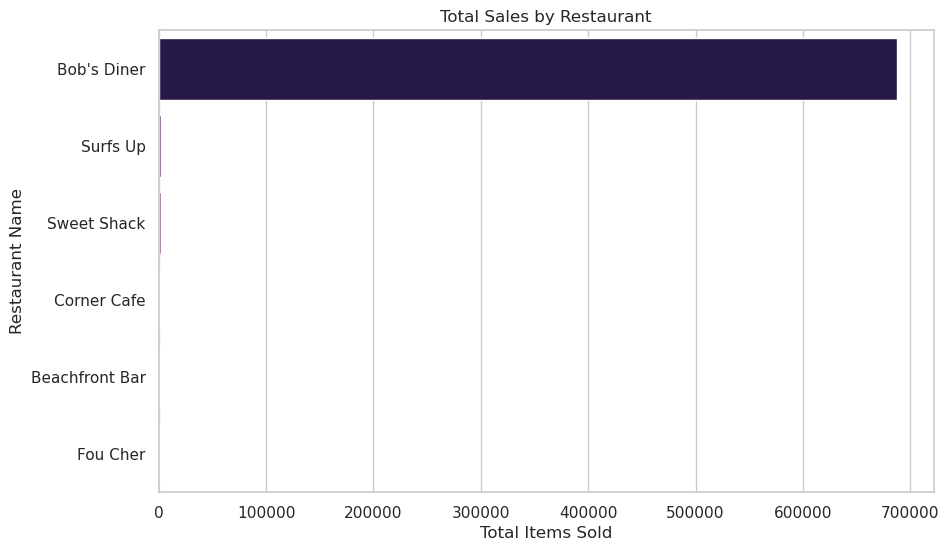

In [15]:
# e. Compare the performances of the different restaurants
print("\ne. Restaurant Performance Analysis:")

# e1. Total sales by restaurant
restaurant_sales = final_df.groupby('store_name')['item_count'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(x=restaurant_sales.values, y=restaurant_sales.index, palette="magma")
plt.title('Total Sales by Restaurant')
plt.xlabel('Total Items Sold')
plt.ylabel('Restaurant Name')
plt.show()

<Figure size 1200x600 with 0 Axes>

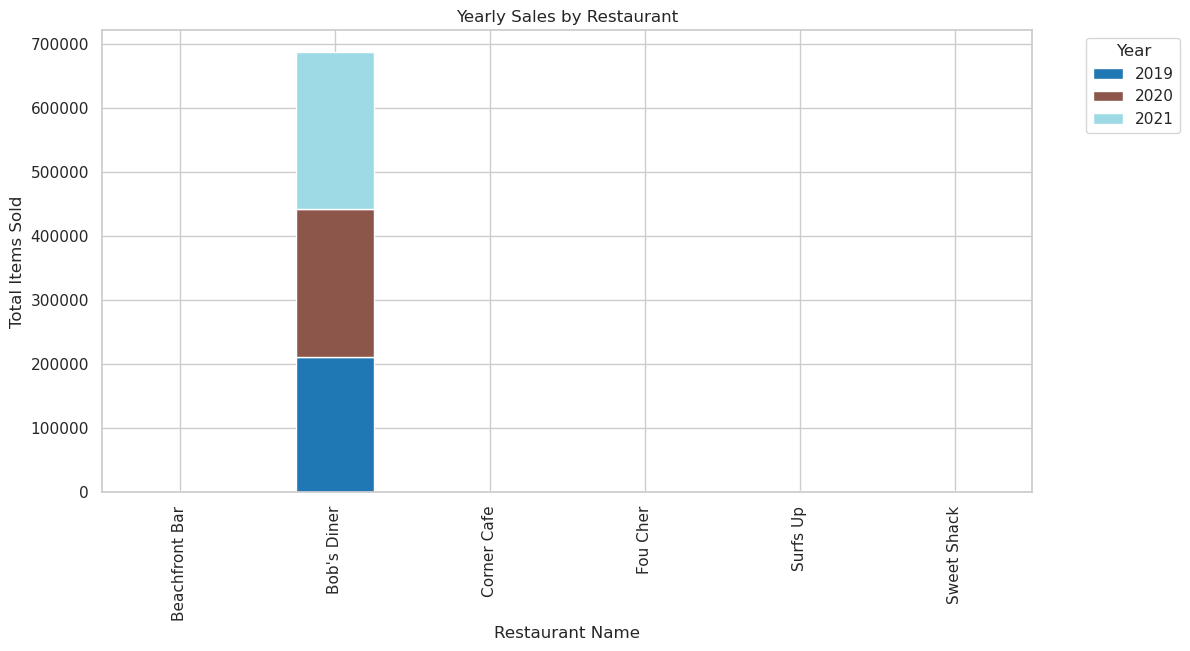

In [16]:
# e2. Yearly sales for each restaurant
final_df['year'] = final_df['date'].dt.year
yearly_sales = final_df.groupby(['store_name', 'year'])['item_count'].sum().unstack()
plt.figure(figsize=(12, 6))
yearly_sales.plot(kind='bar', stacked=True, colormap='tab20', figsize=(12, 6))
plt.title('Yearly Sales by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Items Sold')
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1400x800 with 0 Axes>

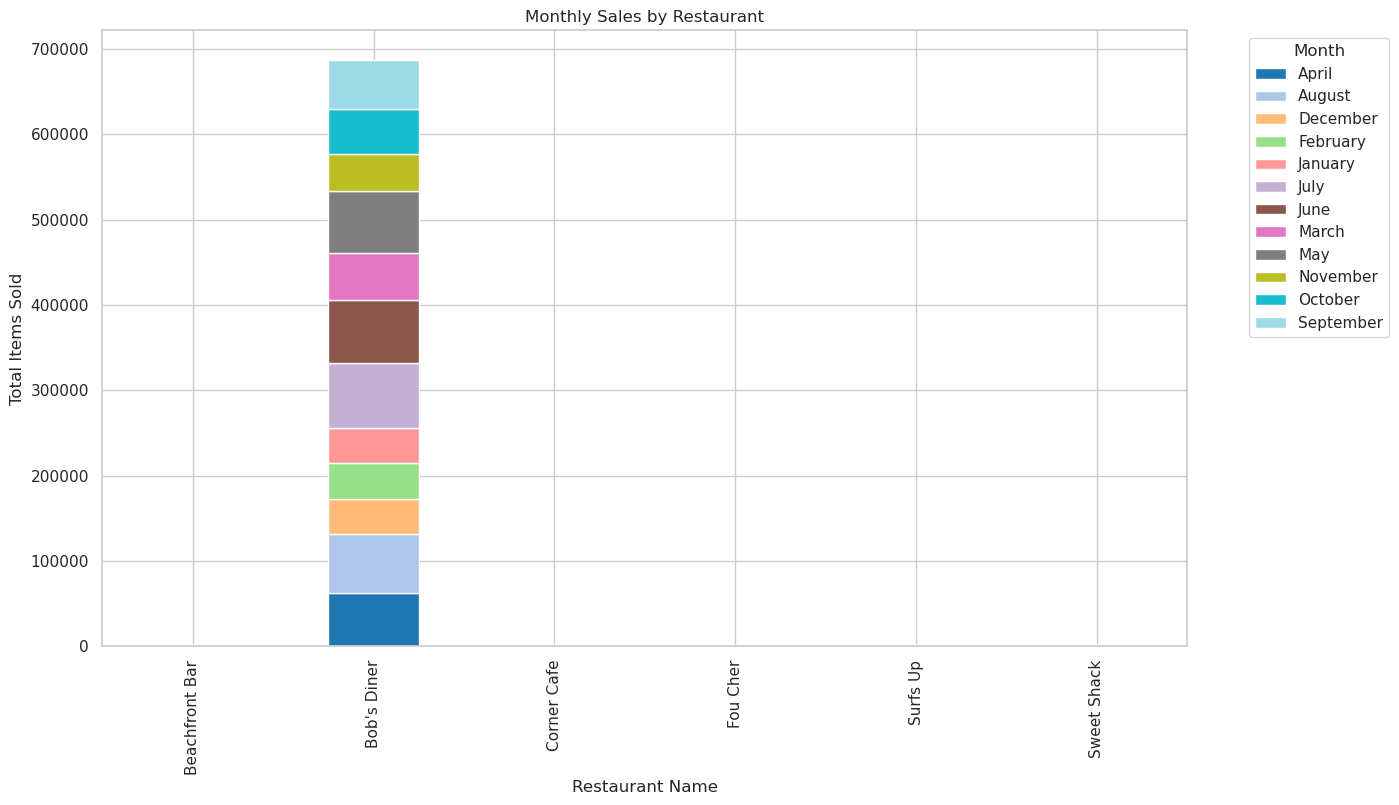

In [17]:
# e3. Monthly sales for each restaurant
monthly_sales_by_restaurant = final_df.groupby(['store_name', 'month'])['item_count'].sum().unstack()
plt.figure(figsize=(14, 8))
monthly_sales_by_restaurant.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Monthly Sales by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Items Sold')
plt.legend(title='Month', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

<Figure size 1400x800 with 0 Axes>

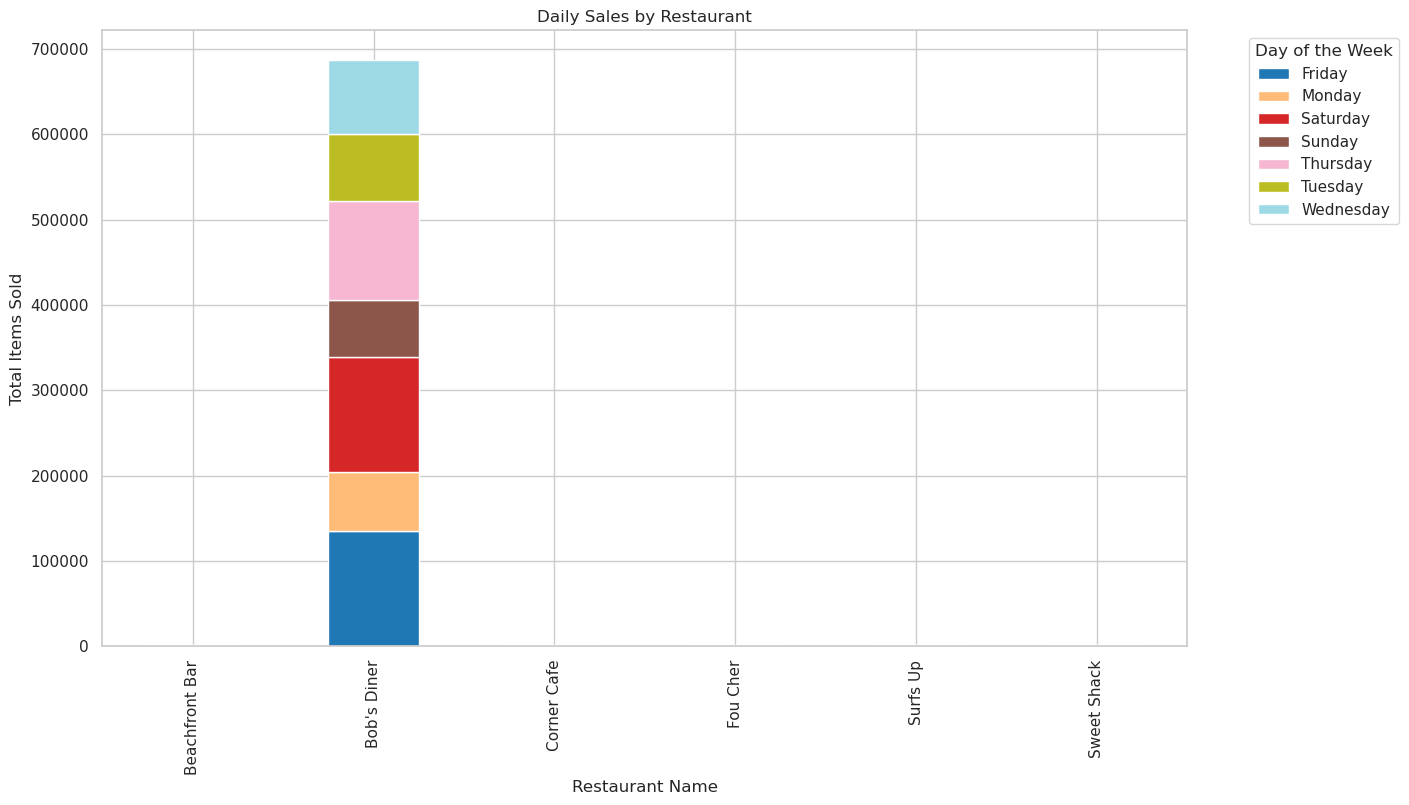

In [18]:
# e4. Daily sales for each restaurant
daily_sales_by_restaurant = final_df.groupby(['store_name', 'day_of_week'])['item_count'].sum().unstack()
plt.figure(figsize=(14, 8))
daily_sales_by_restaurant.plot(kind='bar', stacked=True, colormap='tab20', figsize=(14, 8))
plt.title('Daily Sales by Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Total Items Sold')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set(style="whitegrid")

# f. Identify the most popular items overall and the stores where they are being sold
print("f. Most Popular Items Overall and Stores Where They Are Sold:")

# Most popular items overall
most_popular_items = final_df.groupby('item_name')['item_count'].sum().nlargest(10)
print("\nTop 10 Most Popular Items Overall:")
print(most_popular_items)

# Stores where these items are sold
stores_for_popular_items = final_df[final_df['item_name'].isin(most_popular_items.index)]
stores_for_popular_items = stores_for_popular_items.groupby(['item_name', 'store_name'])['item_count'].sum().unstack()
print("\nStores Selling the Most Popular Items:")
print(stores_for_popular_items)

f. Most Popular Items Overall and Stores Where They Are Sold:

Top 10 Most Popular Items Overall:
item_name
Strawberry Smoothy                 236337.0
Frozen Milky Smoothy               103263.0
Amazing pork lunch                  61043.0
Mutton Dinner                       52772.0
Orange Juice                        43874.0
Blue Ribbon Beef Entree             42774.0
Amazing Steak Dinner with Rolls     34439.0
Sweet Frozen Soft Drink             27490.0
Sea Bass with Vegetables Dinner     23839.0
Sweet Lamb Cake                     18764.0
Name: item_count, dtype: float64

Stores Selling the Most Popular Items:
store_name                       Bob's Diner  Corner Cafe
item_name                                                
Amazing Steak Dinner with Rolls      34439.0          NaN
Amazing pork lunch                   61043.0          NaN
Blue Ribbon Beef Entree              42774.0          NaN
Frozen Milky Smoothy                102990.0        273.0
Mutton Dinner                  

In [20]:
# g. Find out the most popular item at each store
print("\ng. Most Popular Item at Each Store:")
most_popular_item_per_store = final_df.groupby(['store_name', 'item_name'])['item_count'].sum().reset_index()
most_popular_item_per_store = most_popular_item_per_store.loc[most_popular_item_per_store.groupby('store_name')['item_count'].idxmax()]
print(most_popular_item_per_store[['store_name', 'item_name', 'item_count']])


g. Most Popular Item at Each Store:
        store_name                      item_name  item_count
1   Beachfront Bar        Fantastic Milky Smoothy      1147.0
25     Bob's Diner             Strawberry Smoothy    236337.0
40     Corner Cafe           Frozen Milky Smoothy       273.0
57        Fou Cher  Blue Ribbon Fruity Vegi Lunch       298.0
85        Surfs Up             Awesome Soft Drink       997.0
92     Sweet Shack                Awesome Smoothy      1692.0


In [21]:
# h. Determine if the store with the highest sales volume is also making the most money per day
print("\nh. Store with Highest Sales Volume vs. Most Money per Day:")

# Calculate total sales volume (item_count) and total revenue (price * item_count) per store
store_sales_volume = final_df.groupby('store_name')['item_count'].sum()
store_revenue = final_df.groupby('store_name').apply(lambda x: (x['price'] * x['item_count']).sum())

# Combine into a single DataFrame
store_performance = pd.DataFrame({
    'Total Sales Volume': store_sales_volume,
    'Total Revenue': store_revenue
})

# Find the store with the highest sales volume and the store with the highest revenue
highest_sales_volume_store = store_performance['Total Sales Volume'].idxmax()
highest_revenue_store = store_performance['Total Revenue'].idxmax()

print(f"Store with Highest Sales Volume: {highest_sales_volume_store}")
print(f"Store with Highest Revenue: {highest_revenue_store}")

# Check if they are the same
if highest_sales_volume_store == highest_revenue_store:
    print("The store with the highest sales volume is also making the most money per day.")
else:
    print("The store with the highest sales volume is NOT making the most money per day.")


h. Store with Highest Sales Volume vs. Most Money per Day:
Store with Highest Sales Volume: Bob's Diner
Store with Highest Revenue: Bob's Diner
The store with the highest sales volume is also making the most money per day.


/tmp/ipykernel_323/2789652105.py:6: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  store_revenue = final_df.groupby('store_name').apply(lambda x: (x['price'] * x['item_count']).sum())



i. Most Expensive Item at Each Restaurant and Its Calorie Count:
        store_name                      item_name  price  kcal
68  Beachfront Bar          Sweet Vegi Soft Drink   5.70   538
0      Bob's Diner              Sweet Fruity Cake  29.22   931
58     Corner Cafe                     Pike Lunch  26.37   653
82        Fou Cher  Blue Ribbon Fruity Vegi Lunch  53.98   881
8         Surfs Up                     Steak Meal  26.21   607
79     Sweet Shack  Blue Ribbon Frozen Milky Cake   7.70   636


/tmp/ipykernel_323/362344491.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='store_name', y='kcal', data=most_expensive_items, palette="rocket")


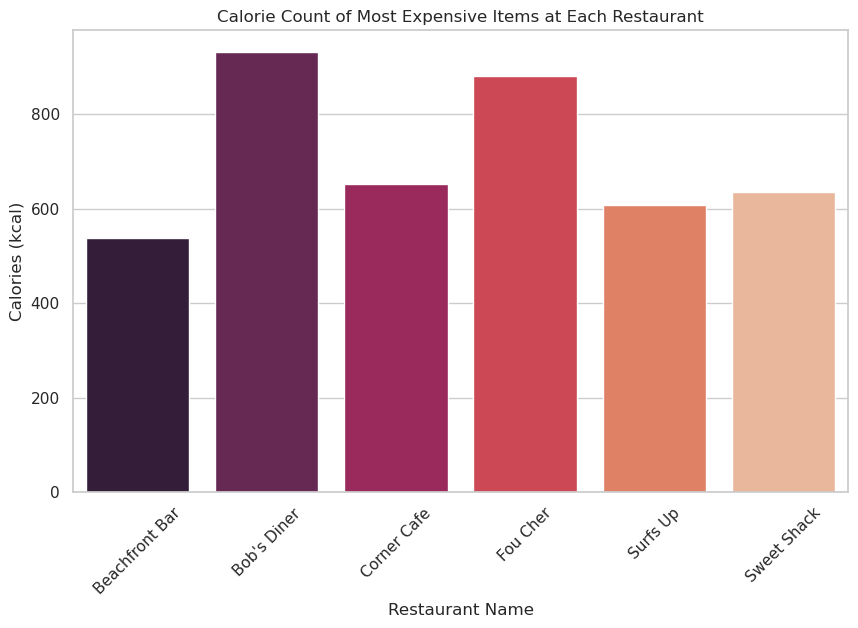

In [22]:
# i. Identify the most expensive item at each restaurant and find out its calorie count
print("\ni. Most Expensive Item at Each Restaurant and Its Calorie Count:")

# Find the most expensive item at each restaurant
most_expensive_items = final_df.loc[final_df.groupby('store_name')['price'].idxmax()]
most_expensive_items = most_expensive_items[['store_name', 'item_name', 'price', 'kcal']]
print(most_expensive_items)

# Plot the most expensive items and their calorie counts
plt.figure(figsize=(10, 6))
sns.barplot(x='store_name', y='kcal', data=most_expensive_items, palette="rocket")
plt.title('Calorie Count of Most Expensive Items at Each Restaurant')
plt.xlabel('Restaurant Name')
plt.ylabel('Calories (kcal)')
plt.xticks(rotation=45)
plt.show()

In [23]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error
from datetime import datetime, timedelta

# Ensure the date column is in datetime format
final_df['date'] = pd.to_datetime(final_df['date'])

# Feature Engineering
print("Generating features...")
final_df['day_of_week'] = final_df['date'].dt.dayofweek  # Monday=0, Sunday=6
final_df['quarter'] = final_df['date'].dt.quarter
final_df['month'] = final_df['date'].dt.month
final_df['year'] = final_df['date'].dt.year
final_df['day_of_month'] = final_df['date'].dt.day

# Aggregate daily sales
daily_sales = final_df.groupby('date')['item_count'].sum().reset_index()

Generating features...


In [24]:
# Merge features with daily sales
daily_sales = pd.merge(daily_sales, final_df[['date', 'day_of_week', 'quarter', 'month', 'year', 'day_of_month']].drop_duplicates(), on='date', how='left')

# Split data into training and testing sets
print("Splitting data into training and testing sets...")
last_date = daily_sales['date'].max()
test_start_date = last_date - timedelta(days=180)  # Last 6 months for testing
train = daily_sales[daily_sales['date'] < test_start_date]
test = daily_sales[daily_sales['date'] >= test_start_date]

# Features and target variable
features = ['day_of_week', 'quarter', 'month', 'year', 'day_of_month']
X_train = train[features]
y_train = train['item_count']
X_test = test[features]
y_test = test['item_count']

Splitting data into training and testing sets...


In [28]:
# a. Build and compare Linear Regression, Random Forest, and XGBoost models
print("Building and comparing models...")

# Linear Regression
print("\nTraining Linear Regression model...")
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_rmse = np.sqrt(mean_squared_error(y_test, lr_predictions))
print(f"Linear Regression RMSE: {lr_rmse}")

Building and comparing models...

Training Linear Regression model...
Linear Regression RMSE: 243.54072634600908


In [29]:
# Random Forest
print("\nTraining Random Forest model...")
rf_model = RandomForestRegressor(
    n_estimators=200,  # Increased number of trees
    max_depth=20,      # Increased depth to capture more complex patterns
    min_samples_split=5,  # Reduced to allow more splits
    min_samples_leaf=2,   # Reduced to allow more granularity
    random_state=42
)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_rmse = np.sqrt(mean_squared_error(y_test, rf_predictions))
print(f"Random Forest RMSE: {rf_rmse}")


Training Random Forest model...
Random Forest RMSE: 60.77213137466752


In [30]:
# XGBoost
print("\nTraining XGBoost model...")
xgb_model = XGBRegressor(
    n_estimators=500,  # Increased number of trees
    learning_rate=0.05,  # Reduced learning rate for better generalization
    max_depth=8,       # Increased depth to capture more complex patterns
    subsample=0.8,     # Use 80% of samples for each tree
    colsample_bytree=0.8,  # Use 80% of features for each tree
    random_state=42
)
xgb_model.fit(X_train, y_train)
xgb_predictions = xgb_model.predict(X_test)
xgb_rmse = np.sqrt(mean_squared_error(y_test, xgb_predictions))
print(f"XGBoost RMSE: {xgb_rmse}")


Training XGBoost model...
XGBoost RMSE: 57.705136894935826


In [31]:
# Compare model performances
print("\nModel Performance Comparison:")
model_comparison = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost'],
    'RMSE': [lr_rmse, rf_rmse, xgb_rmse]
})
print(model_comparison)


Model Performance Comparison:
               Model        RMSE
0  Linear Regression  243.540726
1      Random Forest   60.772131
2            XGBoost   57.705137



Forecasting for the next year using the best-performing model...
Best-performing model: XGBRegressor


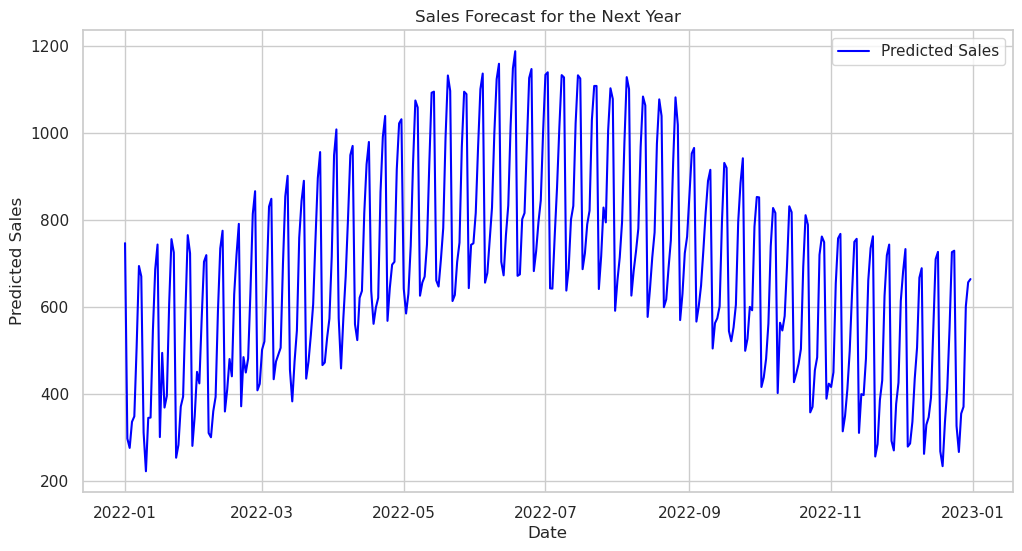

In [32]:
# Use the best-performing model to make a forecast for the next year
print("\nForecasting for the next year using the best-performing model...")
best_model = xgb_model if xgb_rmse < rf_rmse and xgb_rmse < lr_rmse else rf_model if rf_rmse < lr_rmse else lr_model
print(f"Best-performing model: {best_model.__class__.__name__}")

# Generate future dates for the next year
future_dates = pd.date_range(start=last_date + timedelta(days=1), periods=365, freq='D')
future_features = pd.DataFrame({
    'date': future_dates,
    'day_of_week': future_dates.dayofweek,
    'quarter': future_dates.quarter,
    'month': future_dates.month,
    'year': future_dates.year,
    'day_of_month': future_dates.day
})

# Predict sales for the next year
future_predictions = best_model.predict(future_features[features])
future_sales = pd.DataFrame({
    'date': future_dates,
    'predicted_sales': future_predictions
})

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(future_sales['date'], future_sales['predicted_sales'], label='Predicted Sales', color='blue')
plt.title('Sales Forecast for the Next Year')
plt.xlabel('Date')
plt.ylabel('Predicted Sales')
plt.legend()
plt.show()

In [34]:
!pip install tensorflow

  Using cached tensorflow-2.18.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (4.1 kB)
  Using cached absl_py-2.1.0-py3-none-any.whl.metadata (2.3 kB)
  Using cached astunparse-1.6.3-py2.py3-none-any.whl.metadata (4.4 kB)
  Using cached flatbuffers-25.1.24-py2.py3-none-any.whl.metadata (875 bytes)
  Using cached gast-0.6.0-py3-none-any.whl.metadata (1.3 kB)
  Using cached google_pasta-0.2.0-py3-none-any.whl.metadata (814 bytes)
  Using cached libclang-18.1.1-py2.py3-none-manylinux2010_x86_64.whl.metadata (5.2 kB)
  Using cached opt_einsum-3.4.0-py3-none-any.whl.metadata (6.3 kB)
  Using cached protobuf-5.29.3-cp38-abi3-manylinux2014_x86_64.whl.metadata (592 bytes)
  Using cached termcolor-2.5.0-py3-none-any.whl.metadata (6.1 kB)
  Using cached grpcio-1.70.0-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (3.9 kB)
  Using cached tensorboard-2.18.0-py3-none-any.whl.metadata (1.6 kB)
  Using cached keras-3.8.0-py3-none-any.whl.metadata (5.8 kB)
 

In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Input
from tensorflow.keras.callbacks import EarlyStopping
import os

# --------------------------
# Disable GPU if CUDA errors persist
# --------------------------
os.environ["CUDA_VISIBLE_DEVICES"] = "-1"  # Force CPU usage

# --------------------------------------------------------
# a. Use sales amount for predictions instead of item count
# --------------------------------------------------------
# Avoid groupby.apply warning by using agg
daily_sales = final_df.groupby('date').agg(
    sales_amount=('price', lambda x: (x * final_df.loc[x.index, 'item_count']).sum())
).reset_index()

2025-02-08 00:59:57.713040: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-08 00:59:57.716342: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2025-02-08 00:59:57.724737: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1738976397.735663     323 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1738976397.739662     323 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-02-08 00:59:57.753436: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [36]:
# ------------------------------------------
# b. Build an LSTM model for predictions
# ------------------------------------------
# Generate synthetic data (assuming last 12 months are available)
last_date = daily_sales['date'].max()
test_start_date = last_date - pd.DateOffset(months=12)
train = daily_sales[daily_sales['date'] < test_start_date]
test = daily_sales[daily_sales['date'] >= test_start_date]

# Scale the data
scaler = MinMaxScaler(feature_range=(0, 1))
train_scaled = scaler.fit_transform(train[['sales_amount']])
test_scaled = scaler.transform(test[['sales_amount']])

# Create sequences for LSTM
def create_sequences(data, window_size=60):
    X, y = [], []
    for i in range(window_size, len(data)):
        X.append(data[i-window_size:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

window_size = 90
X_train, y_train = create_sequences(train_scaled, window_size)
X_test, y_test = create_sequences(test_scaled, window_size)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Add Input layer to avoid Keras warning
model = Sequential()
model.add(Input(shape=(X_train.shape[1], 1)))  # Explicit Input layer
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=True))
model.add(Dropout(0.5))
model.add(LSTM(units=100, return_sequences=False))
model.add(Dropout(0.5))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

2025-02-08 01:00:42.274848: E external/local_xla/xla/stream_executor/cuda/cuda_driver.cc:152] failed call to cuInit: INTERNAL: CUDA error: Failed call to cuInit: UNKNOWN ERROR (303)


In [37]:
# Train the model
# early_stop = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
early_stop = EarlyStopping(monitor='val_loss', patience=20, restore_best_weights=True)
history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=64,
    validation_split=0.1,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 4s 223ms/step - loss: 0.1437 - val_loss: 0.0410
Epoch 2/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 184ms/step - loss: 0.0494 - val_loss: 0.0487
Epoch 3/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 207ms/step - loss: 0.0353 - val_loss: 0.0371
Epoch 4/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 189ms/step - loss: 0.0319 - val_loss: 0.0385
Epoch 5/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 188ms/step - loss: 0.0331 - val_loss: 0.0411
Epoch 6/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - loss: 0.0333 - val_loss: 0.0367
Epoch 7/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 213ms/step - loss: 0.0363 - val_loss: 0.0399
Epoch 8/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 194ms/step - loss: 0.0323 - val_loss: 0.0376
Epoch 9/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 189ms/step - loss: 0.0333 - val_loss: 0.0367
Epoch 10/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 186ms/step - loss: 0.0361 - val_loss: 0.0373
Epoch 11/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 187ms/step - loss: 0.0317 - val_loss: 0.0376
Epoch 12/200
9/9 ━━━━━━━━━━━━━━━━━━━━ 3s 200ms/step - loss: 0.0

In [38]:
# Make predictions on test data
predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)
y_test_actual = scaler.inverse_transform(y_test.reshape(-1, 1))

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step


MAPE: 10.18%


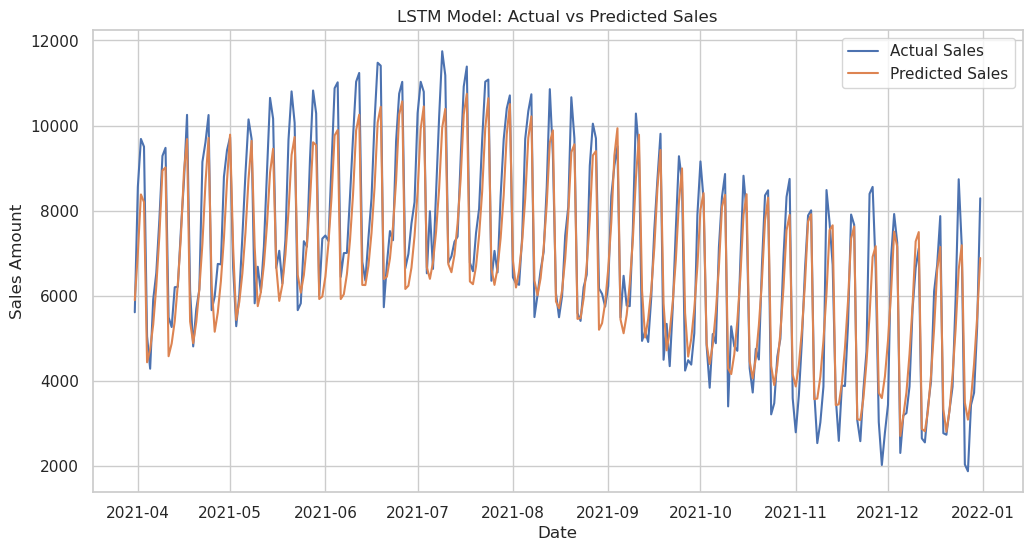

In [39]:
# ------------------------------------------------------
# c. Calculate MAPE and comment on performance
# ------------------------------------------------------
def calculate_mape(actual, predicted):
    return np.mean(np.abs((actual - predicted) / actual)) * 100

mape = calculate_mape(y_test_actual, predictions)
print(f"MAPE: {mape:.2f}%")

# Plot predictions vs actuals
plt.figure(figsize=(12, 6))
plt.plot(test['date'].iloc[window_size:], y_test_actual, label='Actual Sales')
plt.plot(test['date'].iloc[window_size:], predictions, label='Predicted Sales')
plt.title('LSTM Model: Actual vs Predicted Sales')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()

In [40]:
# ---------------------------------------------------------------
# d. Forecast for the next 3 months using the entire dataset
# ---------------------------------------------------------------
full_scaled = scaler.fit_transform(daily_sales[['sales_amount']])
X_full, y_full = create_sequences(full_scaled, window_size)
X_full = X_full.reshape(X_full.shape[0], X_full.shape[1], 1)

model_full = Sequential()
model_full.add(Input(shape=(X_full.shape[1], 1)))  # Explicit Input layer
model_full.add(LSTM(50, return_sequences=True))
model_full.add(Dropout(0.2))
model_full.add(LSTM(50, return_sequences=False))
model_full.add(Dropout(0.2))
model_full.add(Dense(1))
model_full.compile(optimizer='adam', loss='mse')
model_full.fit(X_full, y_full, epochs=100, batch_size=32, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 38ms/step - loss: 0.1032
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0331
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 38ms/step - loss: 0.0335
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0333
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 45ms/step - loss: 0.0340
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0305
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0307
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0335
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0316
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0327
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0294
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0280
Epoch 13/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0289
Epoch 14/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 37ms/step - loss: 0.0254
Epoch 15/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - lo

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━

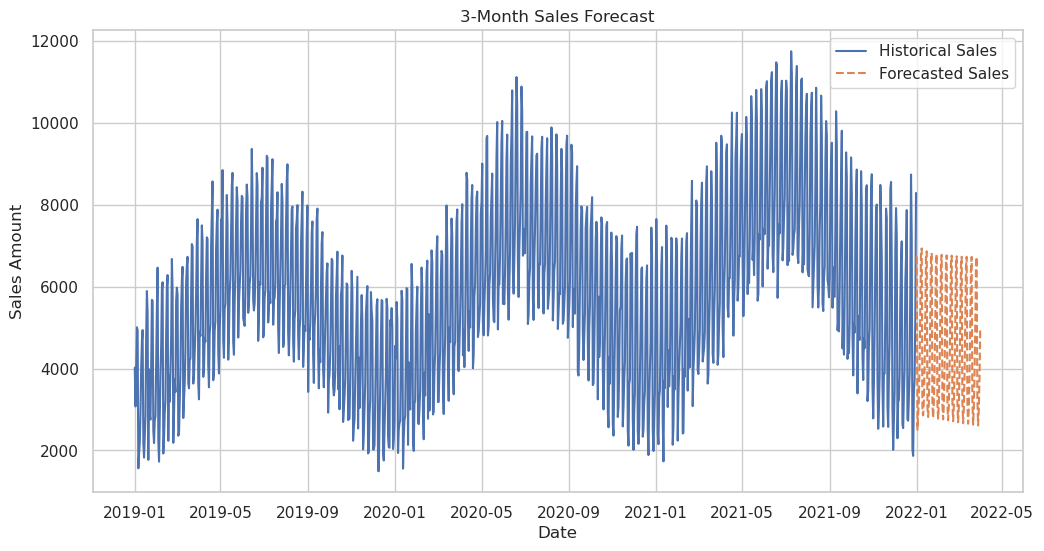

In [41]:
# Generate future dates
future_dates = pd.date_range(start=daily_sales['date'].max() + pd.DateOffset(days=1), periods=90, freq='D')

# Autoregressive forecasting
future_predictions = []
last_sequence = full_scaled[-window_size:].reshape(1, window_size, 1)

for _ in range(90):
    next_pred = model_full.predict(last_sequence)
    future_predictions.append(next_pred[0, 0])
    last_sequence = np.append(last_sequence[:, 1:, :], next_pred.reshape(1, 1, 1), axis=1)

future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))

# Plot the forecast
plt.figure(figsize=(12, 6))
plt.plot(daily_sales['date'], daily_sales['sales_amount'], label='Historical Sales')
plt.plot(future_dates, future_predictions, label='Forecasted Sales', linestyle='--')
plt.title('3-Month Sales Forecast')
plt.xlabel('Date')
plt.ylabel('Sales Amount')
plt.legend()
plt.show()